## Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
import statsmodels.api as sm
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing



> 1. USD to INR Exchange Rate Dataset



In [ ]:
# Step 1: Load and clean the dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/USDINR_2000_2025.csv", skiprows=2)
df.columns = ['Date', 'USDINR']
df['Date'] = pd.to_datetime(df['Date'])
df['USDINR'] = pd.to_numeric(df['USDINR'], errors='coerce')
df = df.sort_values('Date').dropna()

# Step 2: Calculate simple percentage change as FX_Shock
df['Monthly change in USD/INR exchange rate'] = df['USDINR'].pct_change()


save_path = "/content/drive/My Drive/APT_Project/USDINR_FX_Shock_2012_2025.csv"
# Step 3: Filter the date range
filtered_df = df[(df['Date'] >= '2012-03-01') & (df['Date'] <= '2025-03-01')]

# Step 4: Save to new CSV
filtered_df.to_csv(save_path, index=False)

# Optional: Print confirmation
print("Filtered dataset saved as 'USDINR_FX_Shock_2012_2025.csv'")


Filtered dataset saved as 'USDINR_FX_Shock_2012_2025.csv'




> 2. Industrial Production Index Dataset



In [ ]:
# Step 1: Load the CSV
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_IIP_India.csv")

# Step 2: Calculate percentage change
df['Monthly change IIP'] = df['General Index'].pct_change()

# Step 3: Replace NaN (first row) with 0
df['Monthly change IIP'] = df['Monthly change IIP'].fillna(0)

# Step 4: Filter by date range
start_date = '2012-03-01'
end_date = '2025-03-01'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


save_path = "/content/drive/My Drive/APT_Project/IIP_FX_Shock.csv"
# Step 5: Save to new CSV (optional)
df.to_csv(save_path, index=False)

# Optional: Show a preview
print(df.head())


         Date  General Index  Monthly change IIP
0  2012-03-01           99.2            0.000000
1  2012-04-01           99.3            0.001008
2  2012-05-01          105.0            0.057402
3  2012-06-01          102.3           -0.025714
4  2012-07-01          101.5           -0.007820




> 3. Consumer Price Index Dataset



In [ ]:
# Step 1: Load the CSV and set row 1 (index 0) as header
df = pd.read_csv("/content/drive/My Drive/APT_Project/CPIndex_Jan13-To-May25.csv", skiprows=1)

# Step 2: Rename columns for clarity
df.columns = ['Year', 'Month', 'State', 'Group', 'Sub Group',
              'Description', 'Rural', 'Urban', 'Combined', 'Status']

# Step 3: Drop unnecessary columns (e.g., State, Group, etc.)
df = df[['Year', 'Month', 'Description', 'Combined']]

# Step 4: Filter to rows where Description is "General Index (All Groups)"
df = df[df['Description'] == 'General Index (All Groups)']

# Step 5: Create 'Date' column in YYYY-MM-DD format (assume day = 01)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01', errors='coerce')

# Step 6: Drop Year, Month, Description
df = df.drop(columns=['Year', 'Month', 'Description'])

# Optional: Rearrange columns
df = df[['Date', 'Combined']]

df['CPI_Shock'] = pd.to_numeric(df['Combined'], errors='coerce').pct_change().fillna(0)

save_path = "/content/drive/My Drive/APT_Project/CPI_Shock.csv"
# Step 5: Save to new CSV (optional)
# Step 7: Save cleaned data
df.to_csv(save_path, index=False)

# Show result
df.head()

,Date,Combined,CPI_Shock
0,2011-12-01,94.7,0.000000
1,2012-01-01,95.1,0.004224
2,2012-02-01,95.5,0.004206
3,2012-03-01,96.4,0.009424
4,2012-04-01,97.8,0.014523


In [ ]:
import pandas as pd

# Step 1: Load the existing file
df = pd.read_csv("/content/drive/My Drive/APT_Project/CPI_Shock.csv")

# Step 2: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Filter rows (e.g., keep only from 2013-01-01 to 2025-03-01)
start_date = '2012-03-01'
end_date = '2025-03-01'
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

save_path = "/content/drive/My Drive/APT_Project/Final_CPI_Shock.csv"

# Step 4: Save (overwrite) the existing file
df.to_csv(save_path, index=False)

# Optional: Preview
print(df.head())


        Date  Combined  CPI_Shock
3 2012-03-01      96.4   0.009424
4 2012-04-01      97.8   0.014523
5 2012-05-01      98.6   0.008180
6 2012-06-01      99.8   0.012170
7 2012-07-01     101.1   0.013026




> 4. Interest Rate Dataset


In [ ]:
# Step 1: Load the dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/INDIRLTLT01STM.csv")

# Step 2: Rename and convert columns
df.rename(columns={'observation_date': 'Date', 'INDIRLTLT01STM': 'InterestRate'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['InterestRate'] = pd.to_numeric(df['InterestRate'], errors='coerce')

# Step 3: Drop rows with missing values
df = df.dropna(subset=['Date', 'InterestRate']).sort_values('Date')

# Step 4: Compute interest rate shock (absolute difference)
df['Interest_Shock'] = df['InterestRate'].diff().fillna(0)

# ✅ Step 5: Filter date range AFTER calculating difference
df = df[(df['Date'] >= '2012-03-01') & (df['Date'] <= '2025-03-01')]


save_path = "/content/drive/My Drive/APT_Project/Final_Interest_Shock.csv"
# Step 6: Save final dataset
df.to_csv(save_path, index=False)

# Optional: View result
print(df.head())



        Date  InterestRate  Interest_Shock
3 2012-03-01          8.37            0.18
4 2012-04-01          8.59            0.22
5 2012-05-01          8.56           -0.03
6 2012-06-01          8.20           -0.36
7 2012-07-01          8.10           -0.10




> Infosys Stock



In [ ]:
# Step 1: Load the two datasets
df1 = pd.read_csv("/content/drive/My Drive/APT_Project/CAPM_Dataset_INFOSYS.csv")     # Replace with your file name
df2 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_CPI_Shock.csv")
df3 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_IIP_Shock.csv")                                                                                                  # Replace with your macro factor file
df4 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_Interest_Shock.csv")
df5 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/USDINR_FX_Shock_2012_2025.csv")

# Step 2: Convert 'Date' columns to datetime to avoid mismatches
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])
df5['Date'] = pd.to_datetime(df5['Date'])

# Step 3: Merge the datasets on 'Date' sequentially
merged_df = pd.merge(df1, df2, on='Date', how='inner')
merged_df = pd.merge(merged_df, df3, on='Date', how='inner')
merged_df = pd.merge(merged_df, df4, on='Date', how='inner')
merged_df = pd.merge(merged_df, df5, on='Date', how='inner')


save_path = "/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_Infosys.csv"
# Step 4: Save the merged dataset to a new CSV
merged_df.to_csv(save_path, index=False)

# Optional: Print first few rows
print(merged_df.head())

        Date     INFY.NS  INFY_Return  Excess_Market  Risk_Free_Rate  \
0 2012-03-01  260.998657    -0.005948      -0.031224        0.007121   
1 2012-04-01  224.193176    -0.141018      -0.015423        0.007103   
2 2012-05-01  221.211060    -0.013302      -0.063663        0.006880   
3 2012-06-01  229.459091     0.037286       0.048974        0.006337   
4 2012-07-01  203.648193    -0.112486      -0.016582        0.006953   

   Excess_INFY  Combined  CPI_Shock  General Index  Monthly change IIP  \
0    -0.013068      96.4   0.009424           99.2            0.000000   
1    -0.148121      97.8   0.014523           99.3            0.001008   
2    -0.020181      98.6   0.008180          105.0            0.057402   
3     0.030949      99.8   0.012170          102.3           -0.025714   
4    -0.119439     101.1   0.013026          101.5           -0.007820   

   InterestRate  Interest_Shock     USDINR  \
0          8.37            0.18  50.868000   
1          8.59            0.2



> HDFCBANK Stock



In [2]:
# Step 1: Load the two datasets
df1 = pd.read_csv("/content/drive/My Drive/APT_Project/CAPM_Dataset_HDFC.csv")     # Replace with your file name
df2 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_CPI_Shock.csv")
df3 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_IIP_Shock.csv")                                                                                                  # Replace with your macro factor file
df4 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_Interest_Shock.csv")
df5 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/USDINR_FX_Shock_2012_2025.csv")

# Step 2: Convert 'Date' columns to datetime to avoid mismatches
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])
df5['Date'] = pd.to_datetime(df5['Date'])

# Step 3: Merge the datasets on 'Date' sequentially
merged_df = pd.merge(df1, df2, on='Date', how='inner')
merged_df = pd.merge(merged_df, df3, on='Date', how='inner')
merged_df = pd.merge(merged_df, df4, on='Date', how='inner')
merged_df = pd.merge(merged_df, df5, on='Date', how='inner')


save_path = "/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_HDFC.csv"
# Step 4: Save the merged dataset to a new CSV
merged_df.to_csv(save_path, index=False)

# Optional: Print first few rows
print(merged_df.head())

        Date  HDFCBANK.NS  HDFC_Return  Excess_Market  Risk_Free_Rate  \
0 2012-03-01   234.597992     0.005318      -0.031224        0.007121   
1 2012-04-01   244.819458     0.043570      -0.015423        0.007103   
2 2012-05-01   228.438034    -0.066912      -0.063663        0.006880   
3 2012-06-01   254.318954     0.113295       0.048974        0.006337   
4 2012-07-01   267.333832     0.051175      -0.016582        0.006953   

   Excess_HDFC  Combined  CPI_Shock  General Index  Monthly change IIP  \
0    -0.001803      96.4   0.009424           99.2            0.000000   
1     0.036467      97.8   0.014523           99.3            0.001008   
2    -0.073792      98.6   0.008180          105.0            0.057402   
3     0.106959      99.8   0.012170          102.3           -0.025714   
4     0.044222     101.1   0.013026          101.5           -0.007820   

   InterestRate  Interest_Shock     USDINR  \
0          8.37            0.18  50.868000   
1          8.59         



> Reliance Stock



In [3]:
# Step 1: Load the two datasets
df1 = pd.read_csv("/content/drive/My Drive/APT_Project/CAPM_Dataset_RELI.csv")     # Replace with your file name
df2 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_CPI_Shock.csv")
df3 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_IIP_Shock.csv")                                                                                                  # Replace with your macro factor file
df4 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/Final_Interest_Shock.csv")
df5 = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/USDINR_FX_Shock_2012_2025.csv")

# Step 2: Convert 'Date' columns to datetime to avoid mismatches
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])
df5['Date'] = pd.to_datetime(df5['Date'])

# Step 3: Merge the datasets on 'Date' sequentially
merged_df = pd.merge(df1, df2, on='Date', how='inner')
merged_df = pd.merge(merged_df, df3, on='Date', how='inner')
merged_df = pd.merge(merged_df, df4, on='Date', how='inner')
merged_df = pd.merge(merged_df, df5, on='Date', how='inner')


save_path = "/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_RELI.csv"
# Step 4: Save the merged dataset to a new CSV
merged_df.to_csv(save_path, index=False)

# Optional: Print first few rows
print(merged_df.head())

        Date  RELIANCE.NS  RELI_Return  Excess_Market  Risk_Free_Rate  \
0 2012-03-01   166.198257    -0.085471      -0.031224        0.007121   
1 2012-04-01   164.980438    -0.007328      -0.015423        0.007103   
2 2012-05-01   156.234314    -0.053013      -0.063663        0.006880   
3 2012-06-01   163.375122     0.045706       0.048974        0.006337   
4 2012-07-01   164.648300     0.007793      -0.016582        0.006953   

   Excess_RELI  Combined  CPI_Shock  General Index  Monthly change IIP  \
0    -0.092591      96.4   0.009424           99.2            0.000000   
1    -0.014430      97.8   0.014523           99.3            0.001008   
2    -0.059893      98.6   0.008180          105.0            0.057402   
3     0.039369      99.8   0.012170          102.3           -0.025714   
4     0.000840     101.1   0.013026          101.5           -0.007820   

   InterestRate  Interest_Shock     USDINR  \
0          8.37            0.18  50.868000   
1          8.59         

## Fit APT Model on Indian Stocks and Various Plots



> Infosys Stock




> Scatterplot of Excess_Return of stock vs Other Variables



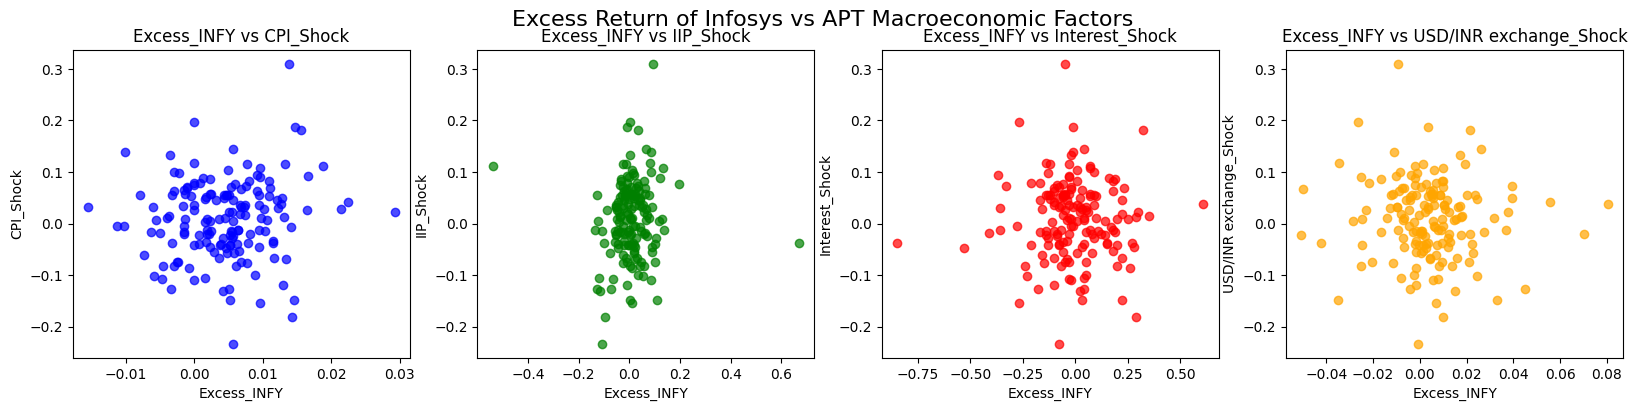

In [27]:
# Load dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_Infosys.csv", parse_dates=["Date"])



# Set figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle("Excess Return of Infosys vs APT Macroeconomic Factors", fontsize=16)

# Plot 1: vs ΔInterest
axes[0].scatter(df["CPI_Shock"], df["Excess_INFY"], color='blue', alpha=0.7)
axes[0].set_title("Excess_INFY vs CPI_Shock")
axes[0].set_xlabel("Excess_INFY")
axes[0].set_ylabel("CPI_Shock")

# Plot 2: vs %ΔIIP
axes[1].scatter(df["Monthly change IIP"], df["Excess_INFY"], color='green', alpha=0.7)
axes[1].set_title("Excess_INFY vs IIP_Shock")
axes[1].set_xlabel("Excess_INFY")
axes[1].set_ylabel("IIP_Shock")


axes[2].scatter(df["Interest_Shock"], df["Excess_INFY"], color='red', alpha=0.7)
axes[2].set_title("Excess_INFY vs Interest_Shock")
axes[2].set_xlabel("Excess_INFY")
axes[2].set_ylabel("Interest_Shock")



axes[3].scatter(df["Monthly change in USD/INR exchange rate"], df["Excess_INFY"], color='orange', alpha=0.7)
axes[3].set_title("Excess_INFY vs USD/INR exchange_Shock")
axes[3].set_xlabel("Excess_INFY")
axes[3].set_ylabel("USD/INR exchange_Shock")

plt.show()




> Regression Fit



In [15]:
# Step 1: Load your merged dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_Infosys.csv", parse_dates=["Date"])


# Step 2: Select independent variables (macroeconomic factors)
X = df[["CPI_Shock", "Monthly change IIP", "Interest_Shock", "Monthly change in USD/INR exchange rate"]]
X = sm.add_constant(X)  # Adds intercept term

# Step 4: Define dependent variable
y = df["Excess_INFY"]

# Step 5: Run the regression
model = sm.OLS(y, X).fit(cov_type= 'HC1')

print(model.summary())
# Step 6: Print only coefficients (α and βs)
print("===== APT Coefficients (Infosys) =====")
coefficients = model.params
for name, value in coefficients.items():
    print(f"{name}: {value:.4f}")

                            OLS Regression Results                            
Dep. Variable:            Excess_INFY   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6254
Date:                Sun, 13 Jul 2025   Prob (F-statistic):              0.645
Time:                        12:11:40   Log-Likelihood:                 182.06
No. Observations:                 157   AIC:                            -354.1
Df Residuals:                     152   BIC:                            -338.8
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------



> Scatter Plot of Residuals Vs APT Factors



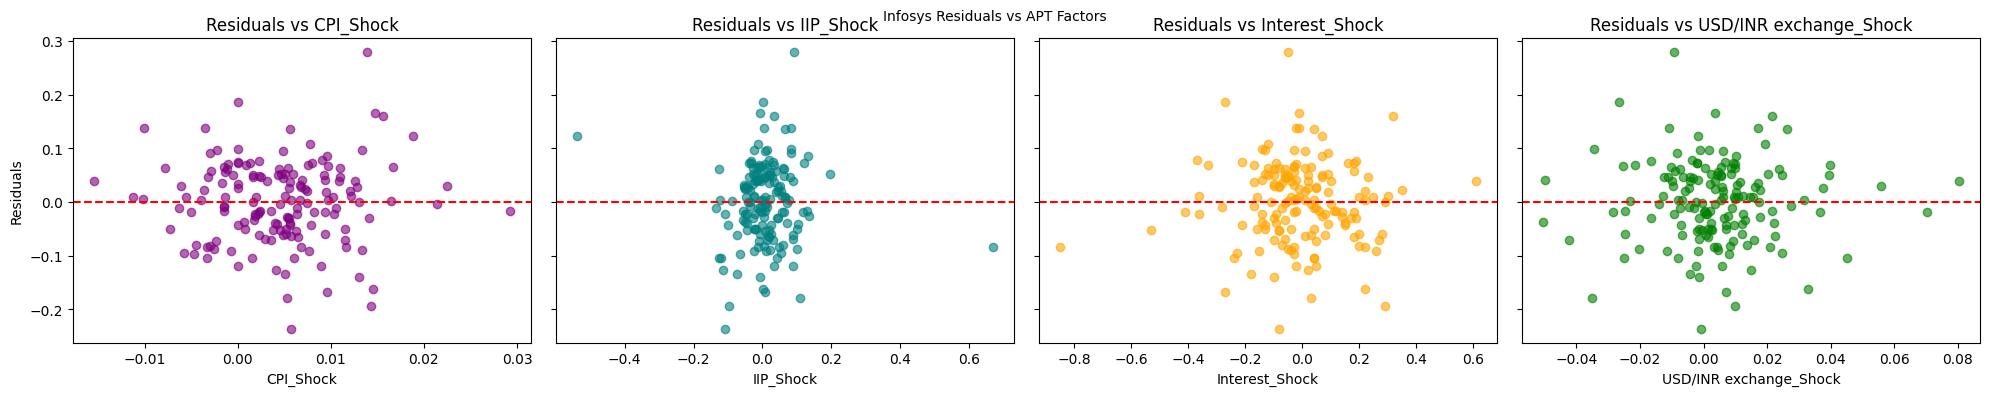

In [18]:
# Step 1: Predict Infosys excess return using the model
df['Predicted_Excess_INFY'] = model.predict(X)

# Step 2: Calculate residuals
df['Residuals'] = y - df['Predicted_Excess_INFY']



# Step 1: Set up figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

# Plot 1:
axs[0].scatter(X['CPI_Shock'], df['Residuals'], color='purple', alpha=0.6)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuals vs CPI_Shock')
axs[0].set_xlabel('CPI_Shock')
axs[0].set_ylabel('Residuals')

# Plot 2:
axs[1].scatter(X['Monthly change IIP'], df['Residuals'], color='teal', alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs IIP_Shock')
axs[1].set_xlabel('IIP_Shock')

# Plot 3:
axs[2].scatter(X['Interest_Shock'], df['Residuals'], color='orange', alpha=0.6)
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals vs Interest_Shock')
axs[2].set_xlabel('Interest_Shock')

# Plot 4:
axs[3].scatter(X['Monthly change in USD/INR exchange rate'], df['Residuals'], color='green', alpha=0.6)
axs[3].axhline(0, color='red', linestyle='--')
axs[3].set_title('Residuals vs USD/INR exchange_Shock')
axs[3].set_xlabel('USD/INR exchange_Shock')

# Adjust spacing between subplots
plt.tight_layout()

# Final adjustments
plt.suptitle("Infosys Residuals vs APT Factors", fontsize=10)

plt.show()



> Scatter Plot of Residuals Vs Predicted Excess Return



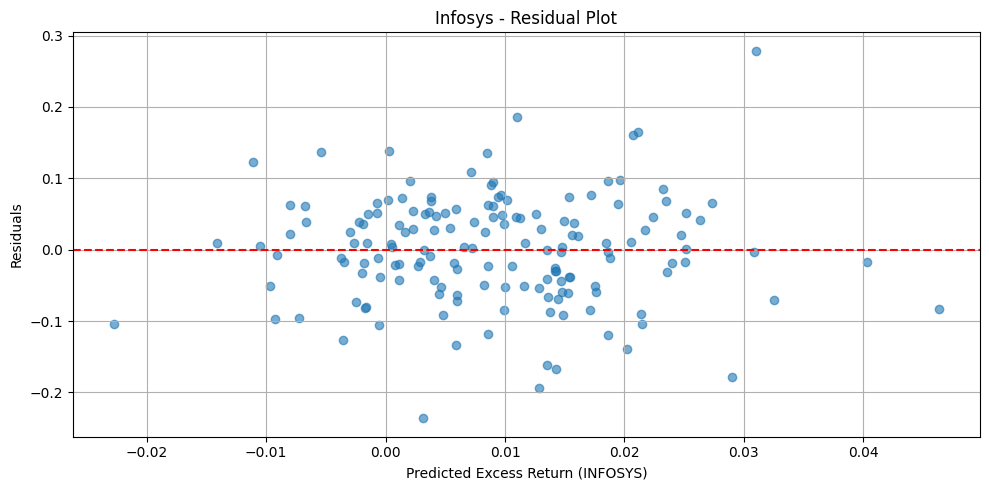

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df['Predicted_Excess_INFY'], df['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Infosys - Residual Plot")
plt.xlabel("Predicted Excess Return (INFOSYS)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



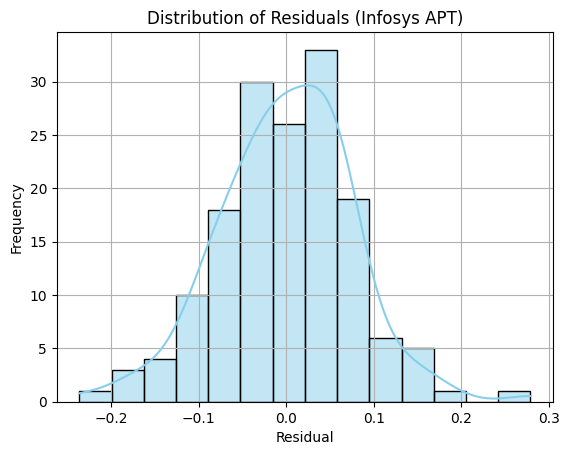

In [21]:
sns.histplot(df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (Infosys APT)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



> Line Plot of Residuals Over Times



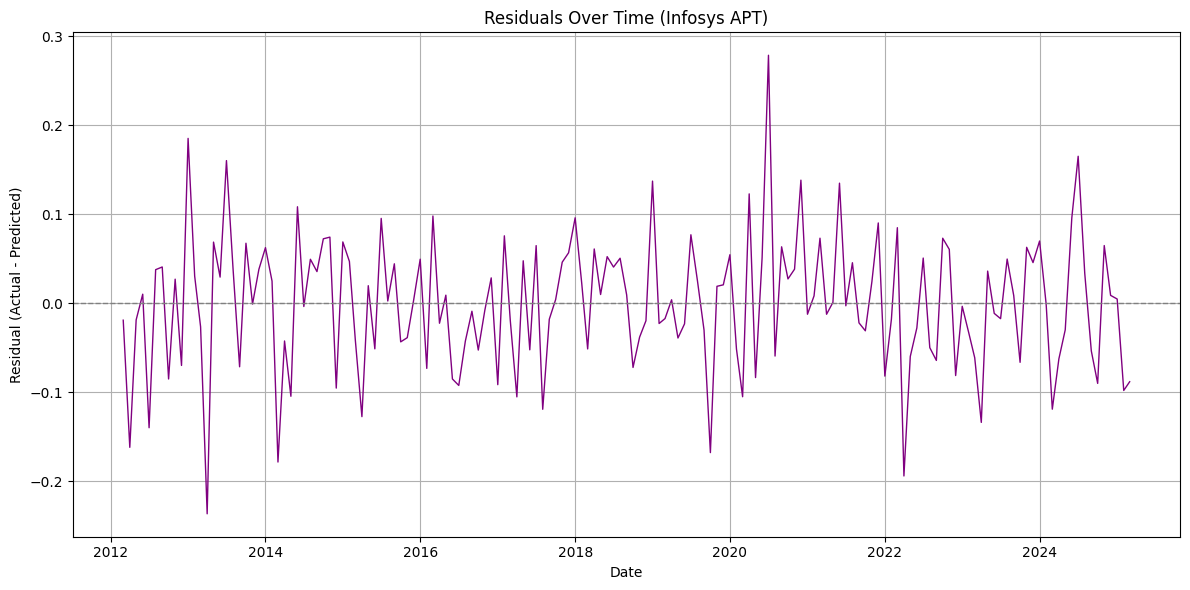

In [22]:
# Convert 'Date' to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (Infosys APT)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Line Plot of Actual Vs Predicted Excess Returns



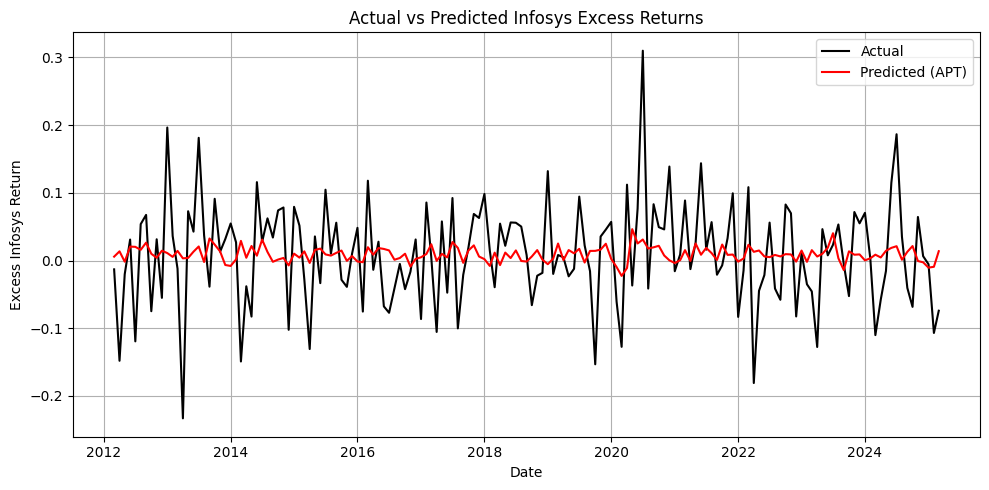

In [23]:
df['Predicted_Excess_INFY'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Excess_INFY'], label='Actual', color='black')
plt.plot(df['Date'], df['Predicted_Excess_INFY'], label='Predicted (APT)', color='red')
plt.title("Actual vs Predicted Infosys Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess Infosys Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Rolling Beta Analysis for Infosys Stock


In [24]:
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_Infosys.csv", parse_dates=["Date"], index_col="Date")

def rolling_apt_betas(df, stock_col, factors, window=36):
    betas = {factor: [] for factor in factors}
    dates = []

    for i in range(window, len(df)):
        window_data = df.iloc[i - window:i]
        X = sm.add_constant(window_data[factors])
        y = window_data[stock_col]
        model = sm.OLS(y, X).fit()
        for factor in factors:
            betas[factor].append(model.params[factor])
        dates.append(df.index[i])

    return pd.DataFrame(betas, index=dates)

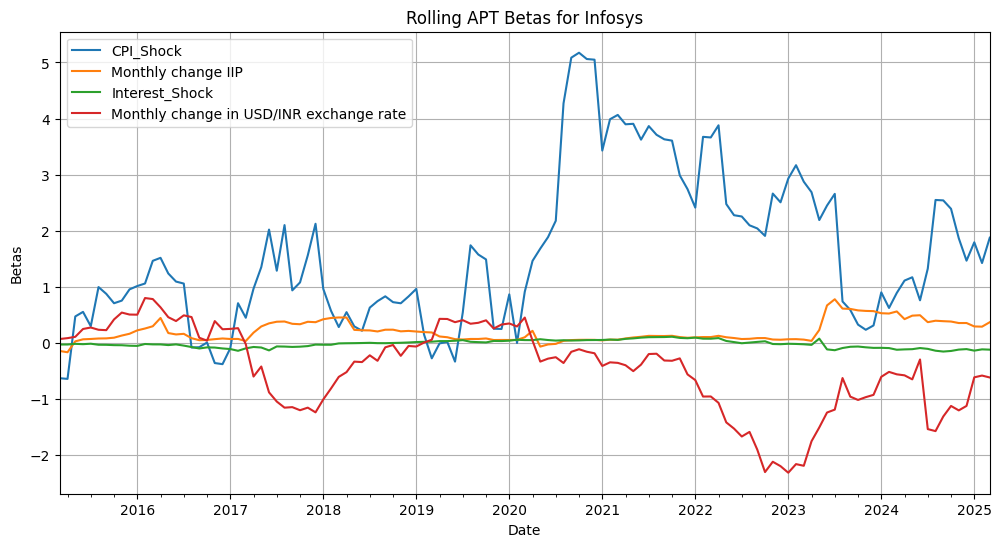

In [25]:
factors = ["CPI_Shock", "Monthly change IIP", "Interest_Shock", "Monthly change in USD/INR exchange rate"]
rolling_betas_apt = rolling_apt_betas(df, "Excess_INFY", factors, window=36)

rolling_betas_apt.plot(figsize=(12, 6), title="Rolling APT Betas for Infosys")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Betas")
plt.show()



> Reliance Stock




> Scatterplot of Excess_Return of stock vs Other Variables



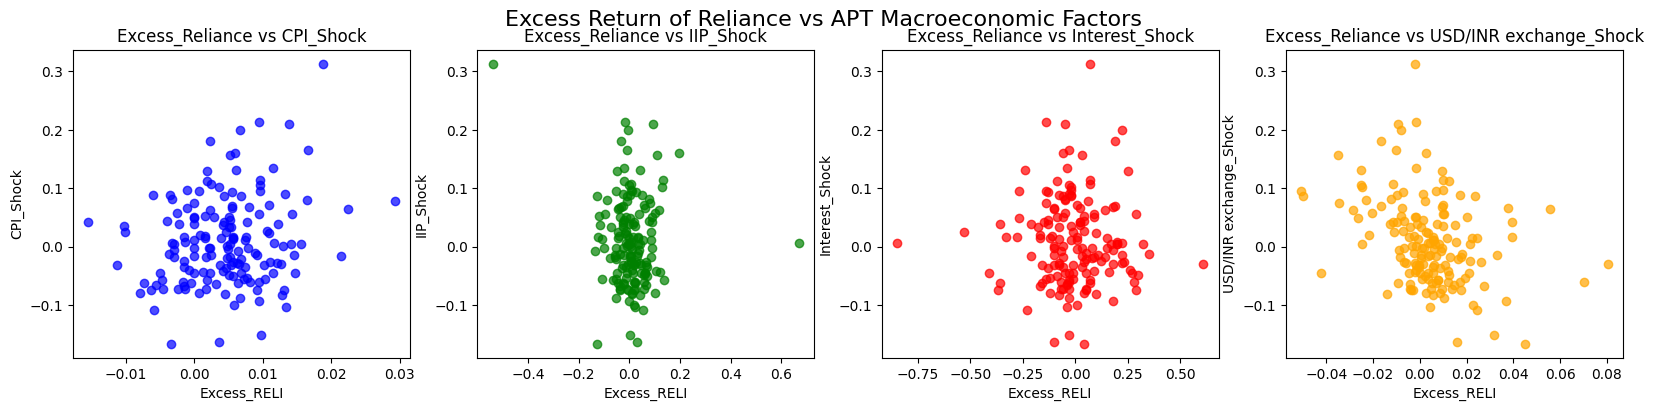

In [28]:
# Load dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_RELI.csv", parse_dates=["Date"])


# Set figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle("Excess Return of Reliance vs APT Macroeconomic Factors", fontsize=16)

# Plot 1: vs ΔInterest
axes[0].scatter(df["CPI_Shock"], df["Excess_RELI"], color='blue', alpha=0.7)
axes[0].set_title("Excess_Reliance vs CPI_Shock")
axes[0].set_xlabel("Excess_RELI")
axes[0].set_ylabel("CPI_Shock")

# Plot 2: vs %ΔIIP
axes[1].scatter(df["Monthly change IIP"], df["Excess_RELI"], color='green', alpha=0.7)
axes[1].set_title("Excess_Reliance vs IIP_Shock")
axes[1].set_xlabel("Excess_RELI")
axes[1].set_ylabel("IIP_Shock")


axes[2].scatter(df["Interest_Shock"], df["Excess_RELI"], color='red', alpha=0.7)
axes[2].set_title("Excess_Reliance vs Interest_Shock")
axes[2].set_xlabel("Excess_RELI")
axes[2].set_ylabel("Interest_Shock")



axes[3].scatter(df["Monthly change in USD/INR exchange rate"], df["Excess_RELI"], color='orange', alpha=0.7)
axes[3].set_title("Excess_Reliance vs USD/INR exchange_Shock")
axes[3].set_xlabel("Excess_RELI")
axes[3].set_ylabel("USD/INR exchange_Shock")

plt.show()



> Regression Fit



In [29]:
# Step 1: Load your merged dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_RELI.csv", parse_dates=["Date"])


# Step 2: Select independent variables (macroeconomic factors)
X = df[["CPI_Shock", "Monthly change IIP", "Interest_Shock", "Monthly change in USD/INR exchange rate"]]
X = sm.add_constant(X)  # Adds intercept term

# Step 4: Define dependent variable
y = df["Excess_RELI"]

# Step 5: Run the regression
model = sm.OLS(y, X).fit(cov_type= 'HC1')

print(model.summary())
# Step 6: Print only coefficients (α and βs)
print("===== APT Coefficients (Infosys) =====")
coefficients = model.params
for name, value in coefficients.items():
    print(f"{name}: {value:.4f}")

                            OLS Regression Results                            
Dep. Variable:            Excess_RELI   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     7.129
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           2.75e-05
Time:                        13:18:19   Log-Likelihood:                 199.76
No. Observations:                 157   AIC:                            -389.5
Df Residuals:                     152   BIC:                            -374.2
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------



> Scatter Plot of Residuals Vs APT Factors



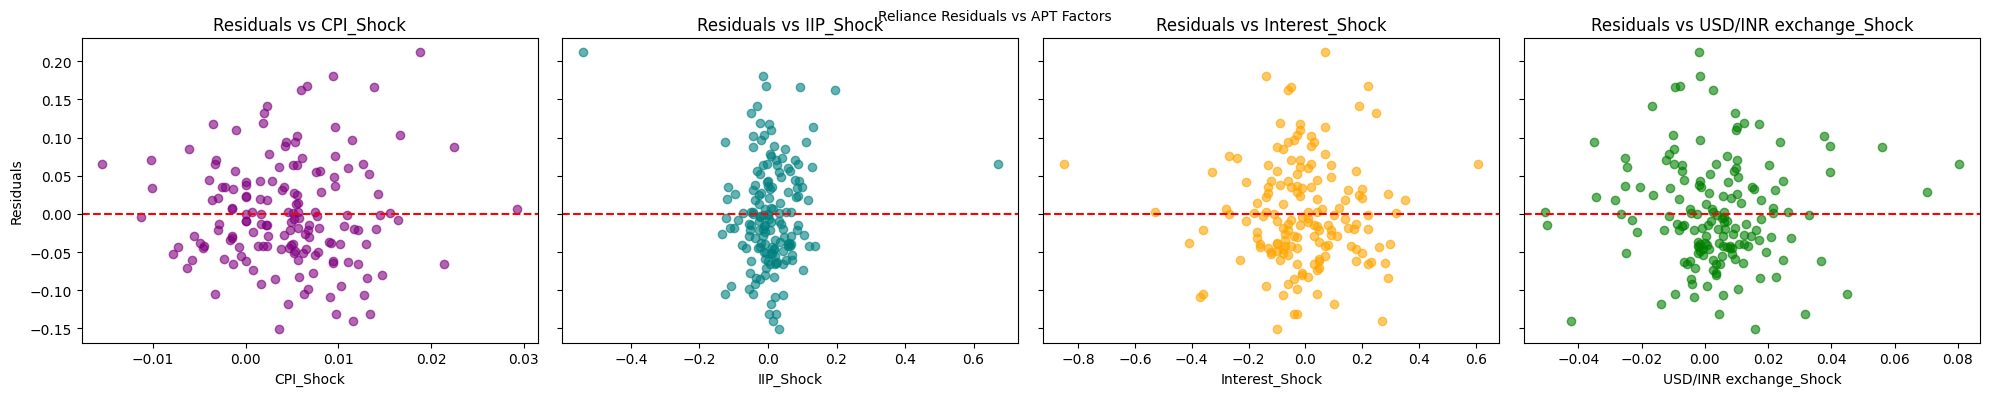

In [30]:
# Step 1: Predict Infosys excess return using the model
df['Predicted_Excess_RELI'] = model.predict(X)

# Step 2: Calculate residuals
df['Residuals'] = y - df['Predicted_Excess_RELI']


# Step 1: Set up figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

# Plot 1:
axs[0].scatter(X['CPI_Shock'], df['Residuals'], color='purple', alpha=0.6)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuals vs CPI_Shock')
axs[0].set_xlabel('CPI_Shock')
axs[0].set_ylabel('Residuals')

# Plot 2:
axs[1].scatter(X['Monthly change IIP'], df['Residuals'], color='teal', alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs IIP_Shock')
axs[1].set_xlabel('IIP_Shock')

# Plot 3:
axs[2].scatter(X['Interest_Shock'], df['Residuals'], color='orange', alpha=0.6)
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals vs Interest_Shock')
axs[2].set_xlabel('Interest_Shock')

# Plot 4:
axs[3].scatter(X['Monthly change in USD/INR exchange rate'], df['Residuals'], color='green', alpha=0.6)
axs[3].axhline(0, color='red', linestyle='--')
axs[3].set_title('Residuals vs USD/INR exchange_Shock')
axs[3].set_xlabel('USD/INR exchange_Shock')

# Adjust spacing between subplots
plt.tight_layout()

# Final adjustments
plt.suptitle("Reliance Residuals vs APT Factors", fontsize=10)

plt.show()



> Scatter Plot of Residuals Vs Predicted Excess Return



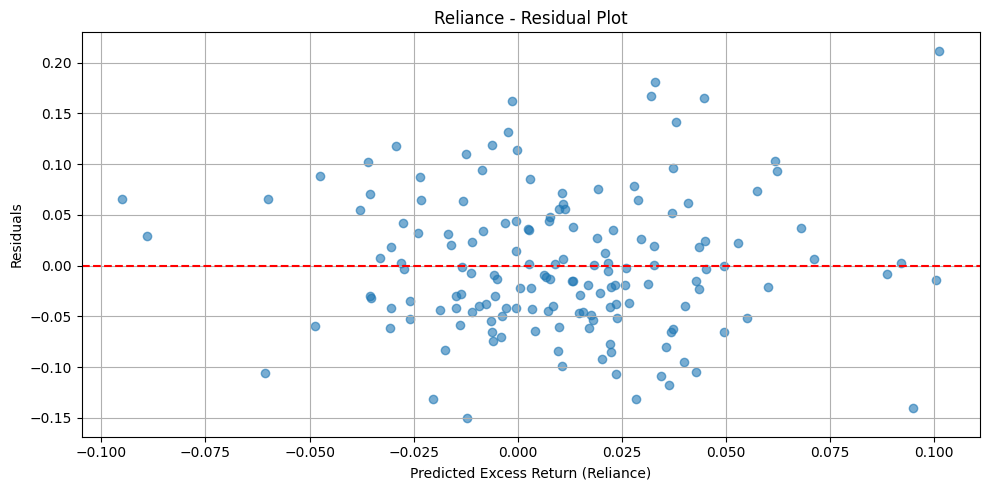

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(df['Predicted_Excess_RELI'], df['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Reliance - Residual Plot")
plt.xlabel("Predicted Excess Return (Reliance)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



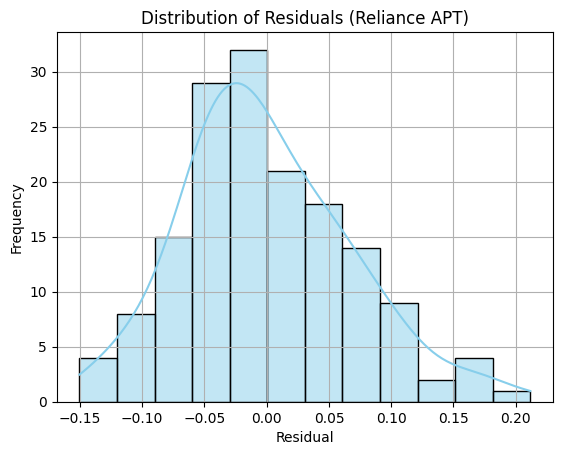

In [32]:
sns.histplot(df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (Reliance APT)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



> Line Plot of Residuals Over Times



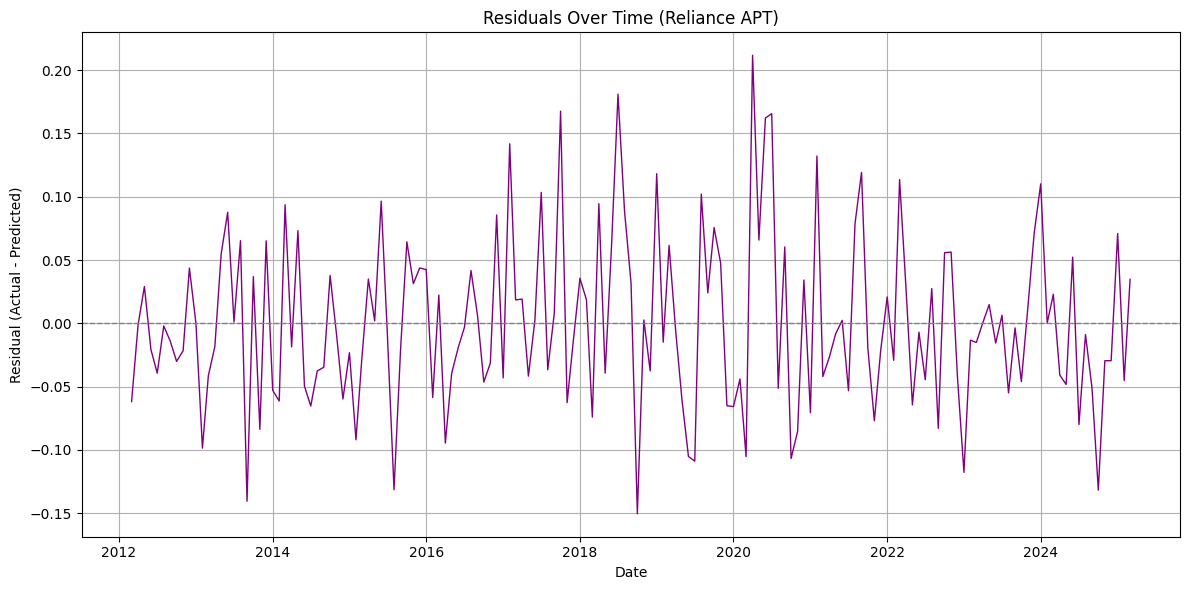

In [33]:
# Convert 'Date' to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (Reliance APT)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Line Plot of Actual Vs Predicted Excess Returns



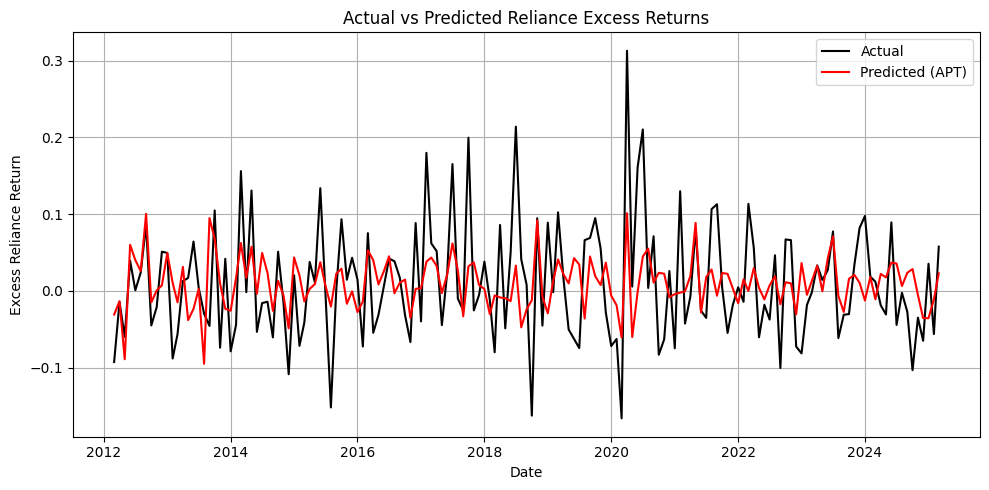

In [34]:
df['Predicted_Excess_RELI'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Excess_RELI'], label='Actual', color='black')
plt.plot(df['Date'], df['Predicted_Excess_RELI'], label='Predicted (APT)', color='red')
plt.title("Actual vs Predicted Reliance Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess Reliance Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Rolling Beta Analysis for Reliance Stock




In [35]:
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_RELI.csv", parse_dates=["Date"], index_col="Date")

def rolling_apt_betas(df, stock_col, factors, window=36):
    betas = {factor: [] for factor in factors}
    dates = []

    for i in range(window, len(df)):
        window_data = df.iloc[i - window:i]
        X = sm.add_constant(window_data[factors])
        y = window_data[stock_col]
        model = sm.OLS(y, X).fit()
        for factor in factors:
            betas[factor].append(model.params[factor])
        dates.append(df.index[i])

    return pd.DataFrame(betas, index=dates)

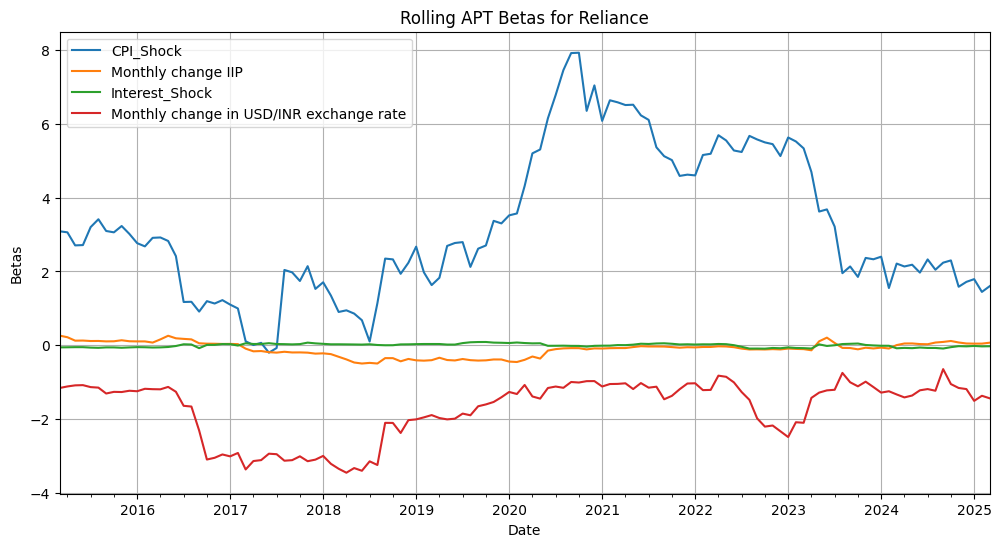

In [36]:
factors = ["CPI_Shock", "Monthly change IIP", "Interest_Shock", "Monthly change in USD/INR exchange rate"]
rolling_betas_apt = rolling_apt_betas(df, "Excess_RELI", factors, window=36)

rolling_betas_apt.plot(figsize=(12, 6), title="Rolling APT Betas for Reliance")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Betas")
plt.show()



> HDFC Bank Stock





> Scatterplot of Excess_Return of stock vs Other Variables



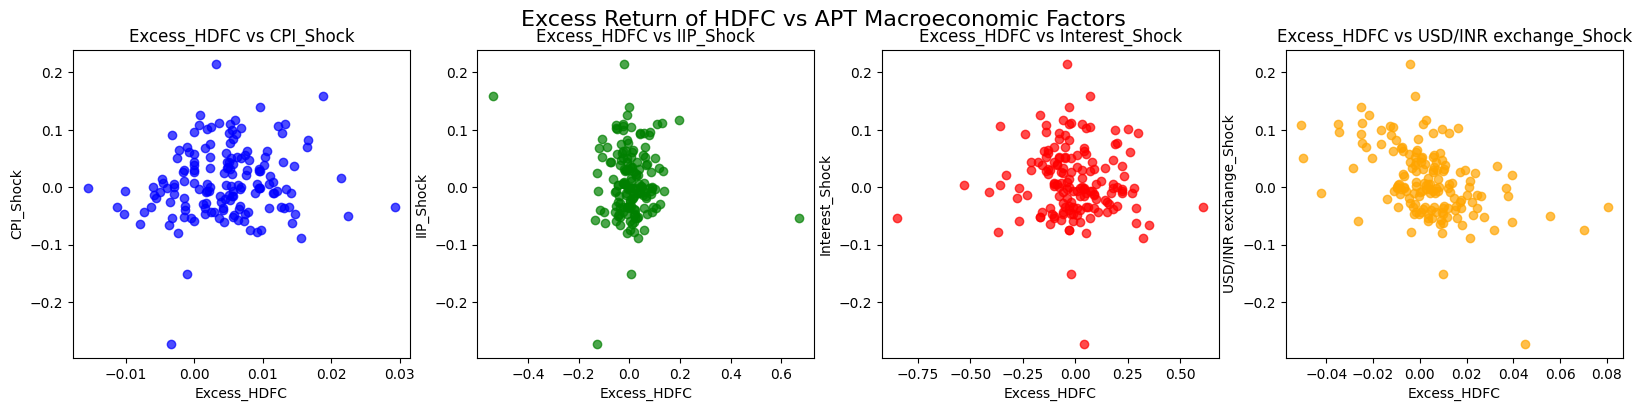

In [37]:
# Load dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_HDFC.csv", parse_dates=["Date"])


# Set figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle("Excess Return of HDFC vs APT Macroeconomic Factors", fontsize=16)

# Plot 1: vs ΔInterest
axes[0].scatter(df["CPI_Shock"], df["Excess_HDFC"], color='blue', alpha=0.7)
axes[0].set_title("Excess_HDFC vs CPI_Shock")
axes[0].set_xlabel("Excess_HDFC")
axes[0].set_ylabel("CPI_Shock")

# Plot 2: vs %ΔIIP
axes[1].scatter(df["Monthly change IIP"], df["Excess_HDFC"], color='green', alpha=0.7)
axes[1].set_title("Excess_HDFC vs IIP_Shock")
axes[1].set_xlabel("Excess_HDFC")
axes[1].set_ylabel("IIP_Shock")


axes[2].scatter(df["Interest_Shock"], df["Excess_HDFC"], color='red', alpha=0.7)
axes[2].set_title("Excess_HDFC vs Interest_Shock")
axes[2].set_xlabel("Excess_HDFC")
axes[2].set_ylabel("Interest_Shock")



axes[3].scatter(df["Monthly change in USD/INR exchange rate"], df["Excess_HDFC"], color='orange', alpha=0.7)
axes[3].set_title("Excess_HDFC vs USD/INR exchange_Shock")
axes[3].set_xlabel("Excess_HDFC")
axes[3].set_ylabel("USD/INR exchange_Shock")

plt.show()



> Regression Fit



In [38]:
# Step 1: Load your merged dataset
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_HDFC.csv", parse_dates=["Date"])


# Step 2: Select independent variables (macroeconomic factors)
X = df[["CPI_Shock", "Monthly change IIP", "Interest_Shock", "Monthly change in USD/INR exchange rate"]]
X = sm.add_constant(X)  # Adds intercept term

# Step 4: Define dependent variable
y = df["Excess_HDFC"]

# Step 5: Run the regression
model = sm.OLS(y, X).fit(cov_type= 'HC1')

print(model.summary())
# Step 6: Print only coefficients (α and βs)
print("===== APT Coefficients (Infosys) =====")
coefficients = model.params
for name, value in coefficients.items():
    print(f"{name}: {value:.4f}")

                            OLS Regression Results                            
Dep. Variable:            Excess_HDFC   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     9.716
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           5.04e-07
Time:                        13:29:07   Log-Likelihood:                 241.17
No. Observations:                 157   AIC:                            -472.3
Df Residuals:                     152   BIC:                            -457.0
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------



> Scatter Plot of Residuals Vs APT Factors



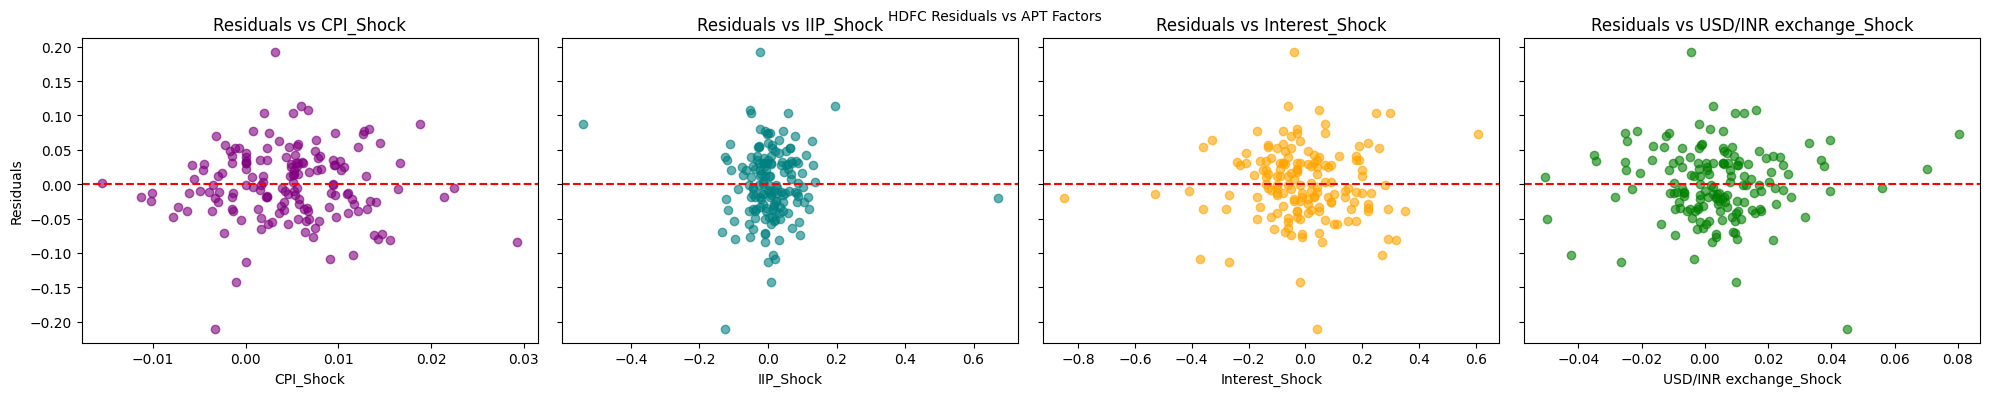

In [39]:
# Step 1: Predict Infosys excess return using the model
df['Predicted_Excess_HDFC'] = model.predict(X)

# Step 2: Calculate residuals
df['Residuals'] = y - df['Predicted_Excess_HDFC']


# Step 1: Set up figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

# Plot 1:
axs[0].scatter(X['CPI_Shock'], df['Residuals'], color='purple', alpha=0.6)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuals vs CPI_Shock')
axs[0].set_xlabel('CPI_Shock')
axs[0].set_ylabel('Residuals')

# Plot 2:
axs[1].scatter(X['Monthly change IIP'], df['Residuals'], color='teal', alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs IIP_Shock')
axs[1].set_xlabel('IIP_Shock')

# Plot 3:
axs[2].scatter(X['Interest_Shock'], df['Residuals'], color='orange', alpha=0.6)
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals vs Interest_Shock')
axs[2].set_xlabel('Interest_Shock')

# Plot 4:
axs[3].scatter(X['Monthly change in USD/INR exchange rate'], df['Residuals'], color='green', alpha=0.6)
axs[3].axhline(0, color='red', linestyle='--')
axs[3].set_title('Residuals vs USD/INR exchange_Shock')
axs[3].set_xlabel('USD/INR exchange_Shock')

# Adjust spacing between subplots
plt.tight_layout()

# Final adjustments
plt.suptitle("HDFC Residuals vs APT Factors", fontsize=10)

plt.show()



> Scatter Plot of Residuals Vs Predicted Excess Return



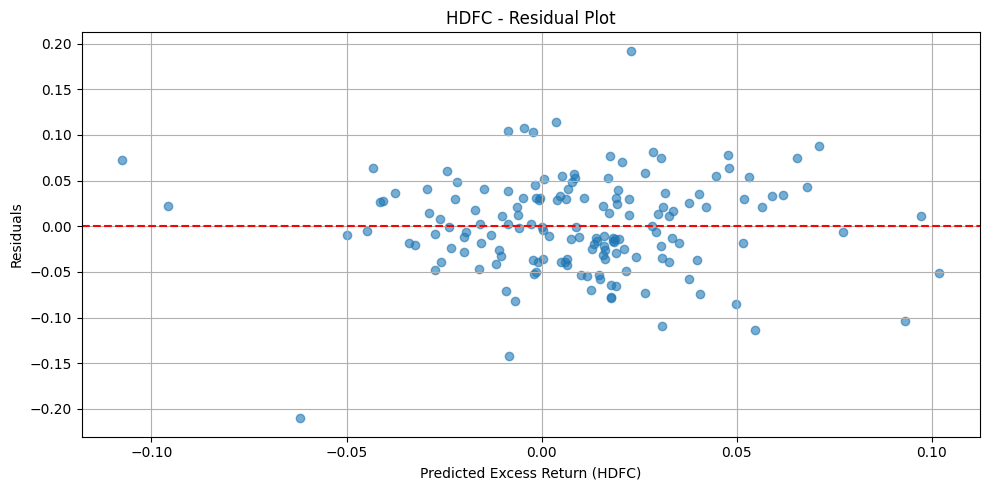

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(df['Predicted_Excess_HDFC'], df['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("HDFC - Residual Plot")
plt.xlabel("Predicted Excess Return (HDFC)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



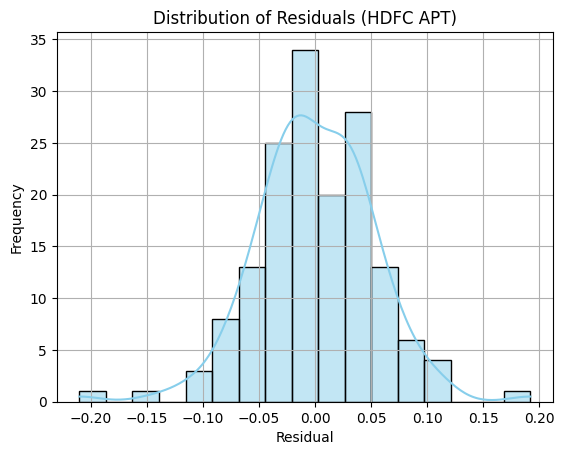

In [41]:
sns.histplot(df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (HDFC APT)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



> Line Plot of Residuals Over Times



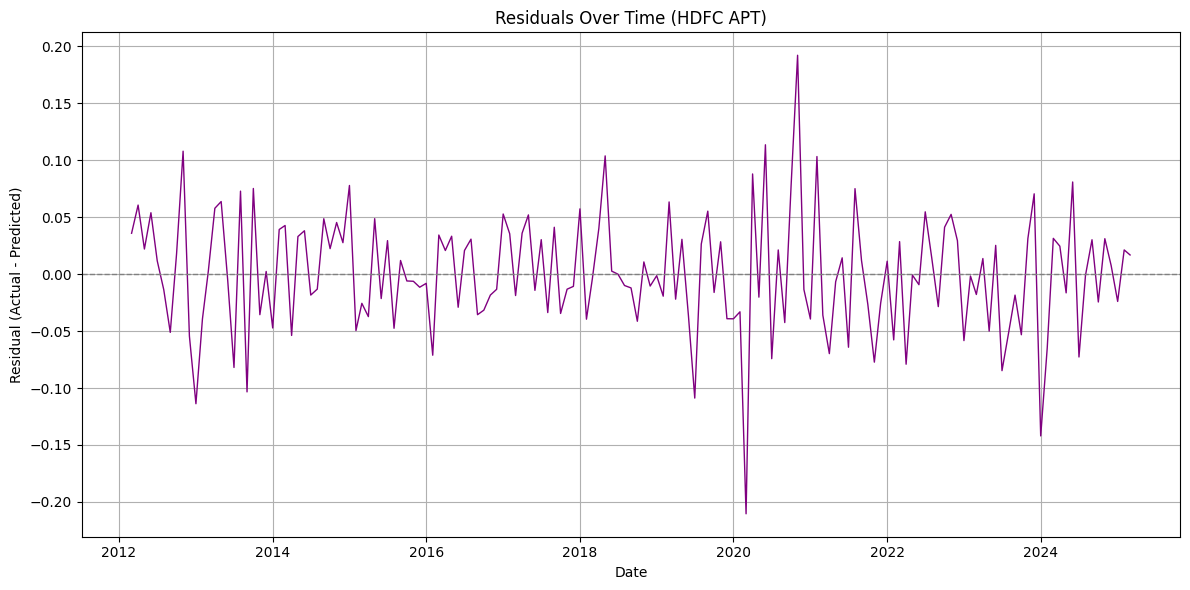

In [42]:
# Convert 'Date' to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (HDFC APT)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Line Plot of Actual Vs Predicted Excess Returns



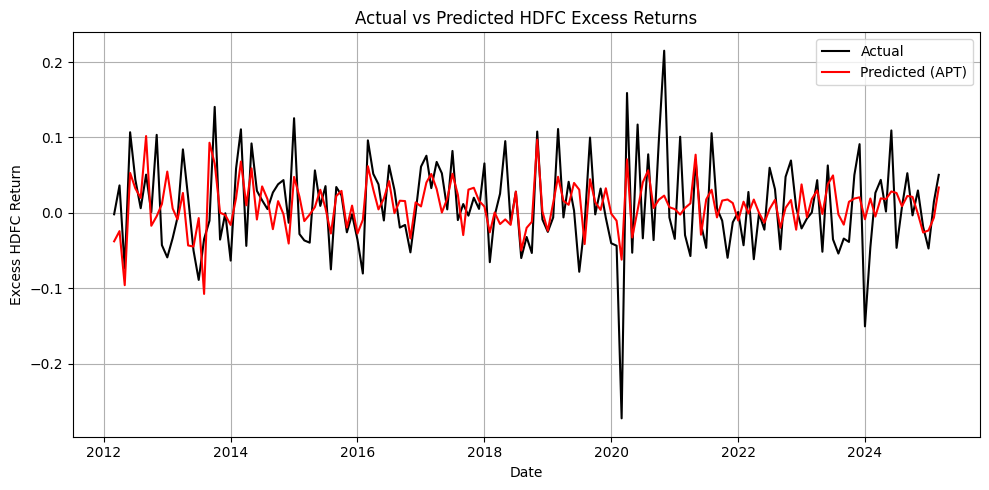

In [43]:
df['Predicted_Excess_HDFC'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Excess_HDFC'], label='Actual', color='black')
plt.plot(df['Date'], df['Predicted_Excess_HDFC'], label='Predicted (APT)', color='red')
plt.title("Actual vs Predicted HDFC Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess HDFC Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Rolling Beta Analysis for HDFCBANK Stock



In [44]:
df = pd.read_csv("/content/drive/My Drive/APT_Project/Final_Datasets/APT_Data_HDFC.csv", parse_dates=["Date"], index_col="Date")

def rolling_apt_betas(df, stock_col, factors, window=36):
    betas = {factor: [] for factor in factors}
    dates = []

    for i in range(window, len(df)):
        window_data = df.iloc[i - window:i]
        X = sm.add_constant(window_data[factors])
        y = window_data[stock_col]
        model = sm.OLS(y, X).fit()
        for factor in factors:
            betas[factor].append(model.params[factor])
        dates.append(df.index[i])

    return pd.DataFrame(betas, index=dates)

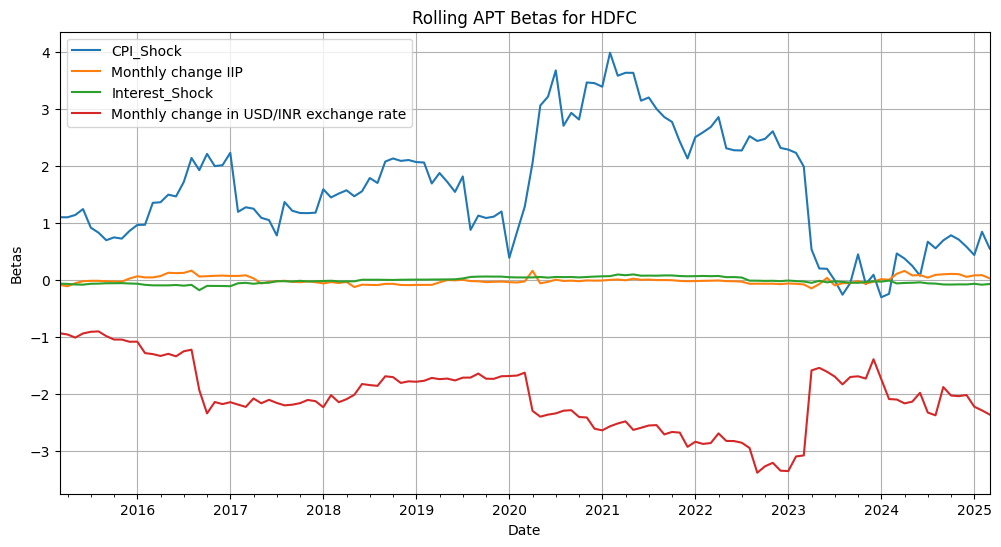

In [45]:
factors = ["CPI_Shock", "Monthly change IIP", "Interest_Shock", "Monthly change in USD/INR exchange rate"]
rolling_betas_apt = rolling_apt_betas(df, "Excess_HDFC", factors, window=36)

rolling_betas_apt.plot(figsize=(12, 6), title="Rolling APT Betas for HDFC")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Betas")
plt.show()